In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

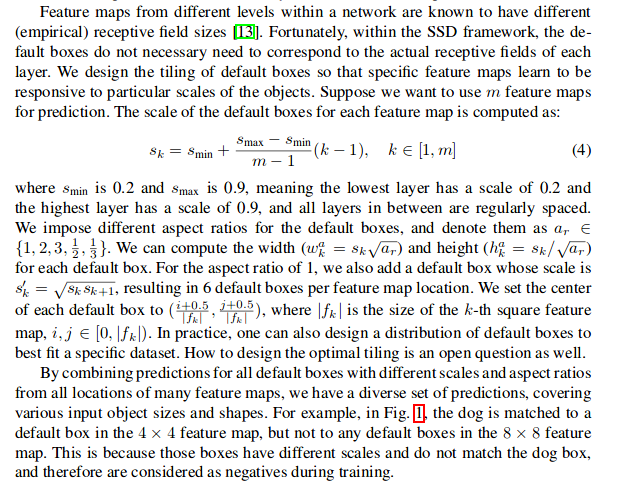

In [4]:
from IPython.display import Image
Image(filename='SSD_Anchor.png')

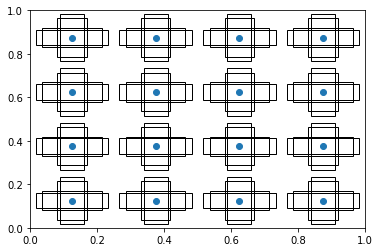

In [20]:
# Computing the scale of default box
import math
input_resolution = 1024
smin = 0.2
smax = 0.9

class AnchorVisualizer:
    def __init__(self):
        self.smin = 0.2
        self.smax = 0.9
        self.input_resolution = 300
        
    def compute_scale(self,k, M):
        """
        smin: scale of anchor boxes in the lowest layer
        smax: scale of anchor boxes in the largest layer
        k: kth layer
        M: total layers, k belong to 1,M
        """
    
        sk = self.smin + (self.smax-self.smin)*(k-1)/(M-1)
        return sk

    def compute_width_and_height(self, scale, bbox_aspect_ration_list):
        """
        in: scale and bbox aspect ratio
        """
    
        width_list = [scale*math.sqrt(a) for a in bbox_aspect_ration_list]
        height_list = [scale/math.sqrt(a) for a in bbox_aspect_ration_list]
        return (width_list, height_list)

    def compute_centers(self, kernel_size):
        """
        kxk is the size of the feature
        """
        centers = []
        for i in range(kernel_size):
            for j in range(kernel_size):
                centers.append([(i+0.5)/kernel_size, (j+0.5)/kernel_size])
    
        return centers
    
    def visualize(self, kernel_size, depth, default_bbox_ratio):
        centers = self.compute_centers(kernel_size)
        c = np.asarray(centers)
        scale = self.compute_scale(kernel_size, depth)
        w,h = self.compute_width_and_height(scale, default_bbox_ratio)
        defaultBox = []
        k = kernel_size
        for i in range(c.shape[0]):
            for j in range(len(w)):
                top_left_x = c[i,0] - (w[j]/2/k)
                top_left_y = c[i,1] - (h[j]/2/k)
                bottom_right_x = c[i,0] + (w[j]/2/k)
                bottom_right_y = c[i,1] + (h[j]/2/k)
                rect = Rectangle((top_left_x,top_left_y), w[j]/k, h[j]/k, fill=False)
                defaultBox.append(rect)
        fig,ax = plt.subplots(1)
        plt.xlim(0,1)
        plt.ylim(0,1)
        for i in range(len(defaultBox)):
            ax.add_patch(defaultBox[i])
        ax.scatter(c[:,0], c[:,1])

current_kernel_size = 4 # considering 4X4 features
total_depth = 8 #The 'm', hypothetical currently
anchor_ratios = [2,3,0.5,0.33]
Anc = AnchorVisualizer()
Anc.visualize(current_kernel_size,total_depth,anchor_ratios)